# Preparing the libraries and dataset

Import relevant libraries

In [ ]:
#Standard libraries for data analysis:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#sklearn modules for Model Evaluation & Improvement:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

#Miscellaneous Utilitiy Libraries:
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

Read the dataset

In [ ]:
dataset= pd.read_csv("/Users/shahad/Desktop/miningProject/ecommerce customer data.csv")
dataset

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24 12:32:18,Home,436,1,3664,Cash,63,0.0,Gabriel Williams,63,Male,0
249996,20455,2021-06-04 05:45:25,Electronics,233,1,4374,Credit Card,66,1.0,Barry Foster,66,Female,0
249997,28055,2022-11-10 17:11:57,Electronics,441,5,5296,Cash,63,NaN,Lisa Johnson,63,Female,0
249998,15023,2021-06-27 14:42:12,Electronics,44,2,2517,Cash,64,1.0,Melissa Fernandez,64,Male,0


# Preprocessing

In [ ]:
#1-Handle missing values
dataset.dropna(inplace=True)

#2-Feature Selection(drop unuseful data(columns))
dataset.drop(columns=['Customer Age','Purchase Date', 'Payment Method','Returns','Customer Name'],inplace=True)
dataset

,Customer ID,Product Category,Product Price,Quantity,Total Purchase Amount,Age,Gender,Churn
0,44605,Home,177,1,2427,31,Female,0
1,44605,Electronics,174,3,2448,31,Female,0
2,44605,Books,413,1,2345,31,Female,0
3,44605,Electronics,396,3,937,31,Female,0
4,44605,Books,259,4,2598,31,Female,0
...,...,...,...,...,...,...,...,...
249994,39806,Electronics,225,5,5293,60,Female,0
249995,33807,Home,436,1,3664,63,Male,0
249996,20455,Electronics,233,1,4374,66,Female,0
249998,15023,Electronics,44,2,2517,64,Male,0


In [ ]:
#3-Drop duplicates
dataset=dataset.drop_duplicates()
dataset

,Customer ID,Product Category,Product Price,Quantity,Total Purchase Amount,Age,Gender,Churn
0,44605,Home,177,1,2427,31,Female,0
1,44605,Electronics,174,3,2448,31,Female,0
2,44605,Books,413,1,2345,31,Female,0
3,44605,Electronics,396,3,937,31,Female,0
4,44605,Books,259,4,2598,31,Female,0
...,...,...,...,...,...,...,...,...
249994,39806,Electronics,225,5,5293,60,Female,0
249995,33807,Home,436,1,3664,63,Male,0
249996,20455,Electronics,233,1,4374,66,Female,0
249998,15023,Electronics,44,2,2517,64,Male,0


In [ ]:
#check if the class label is balanced
x= dataset.drop(['Churn'], axis=1)
y=dataset['Churn']
y.value_counts()

Churn
0    161874
1     40744
Name: count, dtype: int64

In [ ]:
#4- unbalanced
#Perform random undersampling
from imblearn.under_sampling import RandomUnderSampler
underSampling = RandomUnderSampler(sampling_strategy=1) #to become equals to the least
new_x, new_y = underSampling.fit_resample(x,y) #change values
new_y.value_counts()

Churn
0    40744
1    40744
Name: count, dtype: int64

In [ ]:
#Reorder
dataset.reset_index(drop=True,inplace=True)

dataset.to_csv("C:\Users\Asus\Desktop\Mining Project\Mining Project\ecommerce customer data.csv",index=False)

dataset= pd.read_csv("C:\Users\Asus\Desktop\Mining Project\Mining Project\ecommerce customer data.csv")
dataset

,Customer ID,Product Category,Product Price,Quantity,Total Purchase Amount,Age,Gender,Churn
0,44605,Home,177,1,2427,31,Female,0
1,44605,Electronics,174,3,2448,31,Female,0
2,44605,Books,413,1,2345,31,Female,0
3,44605,Electronics,396,3,937,31,Female,0
4,44605,Books,259,4,2598,31,Female,0
...,...,...,...,...,...,...,...,...
202613,39806,Electronics,225,5,5293,60,Female,0
202614,33807,Home,436,1,3664,63,Male,0
202615,20455,Electronics,233,1,4374,66,Female,0
202616,15023,Electronics,44,2,2517,64,Male,0


# Exploratory Data Analysis (EDA)

In [ ]:
# showing math code-statistical measures
cols_to_describe = ['Product Price', 'Quantity', 'Total Purchase Amount', 'Age', 'Churn']
description = dataset[cols_to_describe].describe().round()
print(description)

       Product Price  Quantity  Total Purchase Amount       Age     Churn
count       202618.0  202618.0               202618.0  202618.0  202618.0
mean           255.0       3.0                 2726.0      44.0       0.0
std            142.0       1.0                 1442.0      15.0       0.0
min             10.0       1.0                  100.0      18.0       0.0
25%            133.0       2.0                 1478.0      30.0       0.0
50%            255.0       3.0                 2727.0      44.0       0.0
75%            377.0       4.0                 3975.0      57.0       0.0
max            500.0       5.0                 5350.0      70.0       1.0


In [ ]:
dataset.nunique()

Customer ID              49146
Product Category             4
Product Price              491
Quantity                     5
Total Purchase Amount     5241
Age                         53
Gender                       2
Churn                        2
dtype: int64

In [ ]:
#overview of the data types present in the columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202618 entries, 0 to 202617
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Customer ID            202618 non-null  int64 
 1   Product Category       202618 non-null  object
 2   Product Price          202618 non-null  int64 
 3   Quantity               202618 non-null  int64 
 4   Total Purchase Amount  202618 non-null  int64 
 5   Age                    202618 non-null  int64 
 6   Gender                 202618 non-null  object
 7   Churn                  202618 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 12.4+ MB


In [ ]:
#check for missing or null values
dataset.isnull().sum()

Customer ID              0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Age                      0
Gender                   0
Churn                    0
dtype: int64

In [ ]:
#Distribution of dependent variable, Churn
(dataset[dataset['Churn']==1].shape[0]/dataset.shape[0])*100

20.108776120581588

only around 20% of dtat is showng churn

In [ ]:
#give the count of values which are present in each category
churn = dataset['Churn'].value_counts().reset_index()
churn.head()

,Churn,count
0,0,161874
1,1,40744


0 which means the costumers have not churned which is 161871 and around 4000 customers have already churned

[Text(0.5, 1.0, 'Age Frequency')]

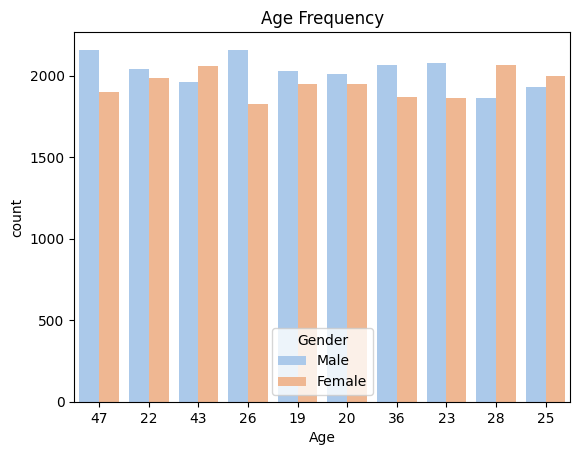

In [ ]:
ax = sns.countplot(dataset=dataset, x='Age', order=dataset.Age.value_counts().nlargest(10).index, palette='pastel', hue='Gender')
ax.set(title='Age Frequency')

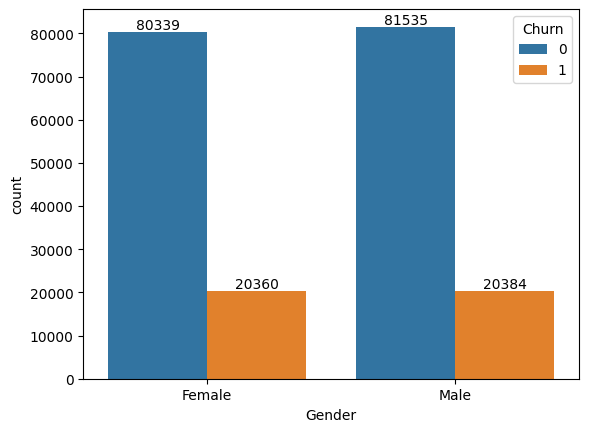

In [ ]:
ax = sns.countplot(dataset=dataset, x='Gender', hue='Churn')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

Famale and Male Customers have about the same average of churn

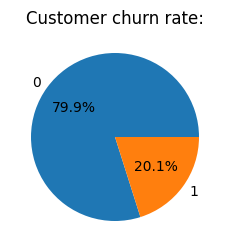

In [ ]:
sizes = dataset['Churn'].value_counts(sort = True)
labels = np.unique(dataset.Churn)
# Visualize the data
plt.figure(figsize = (6,6))
plt.subplot(212)
plt.title("Customer churn rate:")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.show()

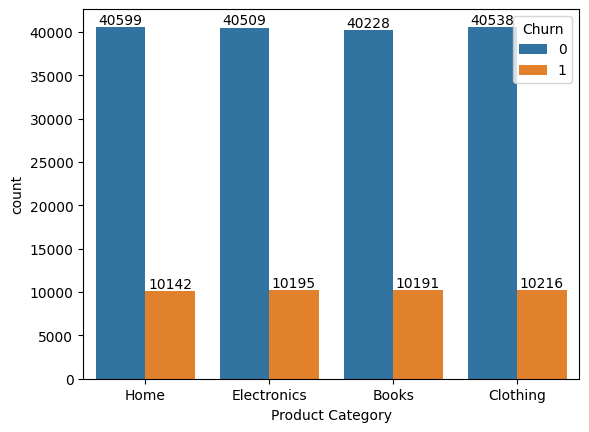

In [ ]:
ax = sns.countplot(dataset=dataset, x='Product Category', hue='Churn')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

Encode Categorical data

In [ ]:
#Incase if user_id is an object:
identity = dataset["Customer ID"]
dataset = dataset.drop(columns="Customer ID")

#Convert rest of categorical variable into dummy:
dataset= pd.get_dummies(dataset)

#Rejoin userid to dataset:
dataset = pd.concat([dataset, identity], axis = 1)

In [ ]:
# Just to ensure that null values have been removed
dataset = dataset.dropna()

Split the dataset into dependent and independent variables

In [ ]:
#Identify response variable:
response = dataset["Churn"]
dataset = dataset.drop(columns="Churn")

Generate training and test datasets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset, response,stratify=response, test_size = 0.2)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (118352, 11)
Number transactions y_train dataset:  (118352,)
Number transactions X_test dataset:  (29588, 11)
Number transactions y_test dataset:  (29588,)


Remove Identifiers

In [ ]:
train_identity = X_train['Customer ID']
X_train = X_train.drop(columns = ['Customer ID'])
test_identity = X_test['Customer ID']
X_test = X_test.drop(columns = ['Customer ID'])

In [ ]:
# Conduct Feature Scaling

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

# Model Selection

Compare Baseline Classification Algorithms (1st Iteration)

In [ ]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0, class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))

# Evaluating Model Results:
acc_results = []
auc_results = []
names = []

# set table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
i = 0

# Evaluate each model using k-fold cross-validation
for name, model in models:
    kfold = model_selection.KFold(n_splits=3, shuffle=True)

    # roc_auc scoring
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')

    auc_results.append(cv_auc_results)
    names.append(name)

    # Append the results to the model_results DataFrame
    model_results.loc[len(model_results)] = {
        'Model': name,
        'ROC AUC Mean': round(cv_auc_results.mean() * 100, 2),
        'ROC AUC Std': round(cv_auc_results.std() * 100, 2)
    }

model_results = model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

Visualize Classification Algorithms Accuracy Comparisons using Area under ROC Curve

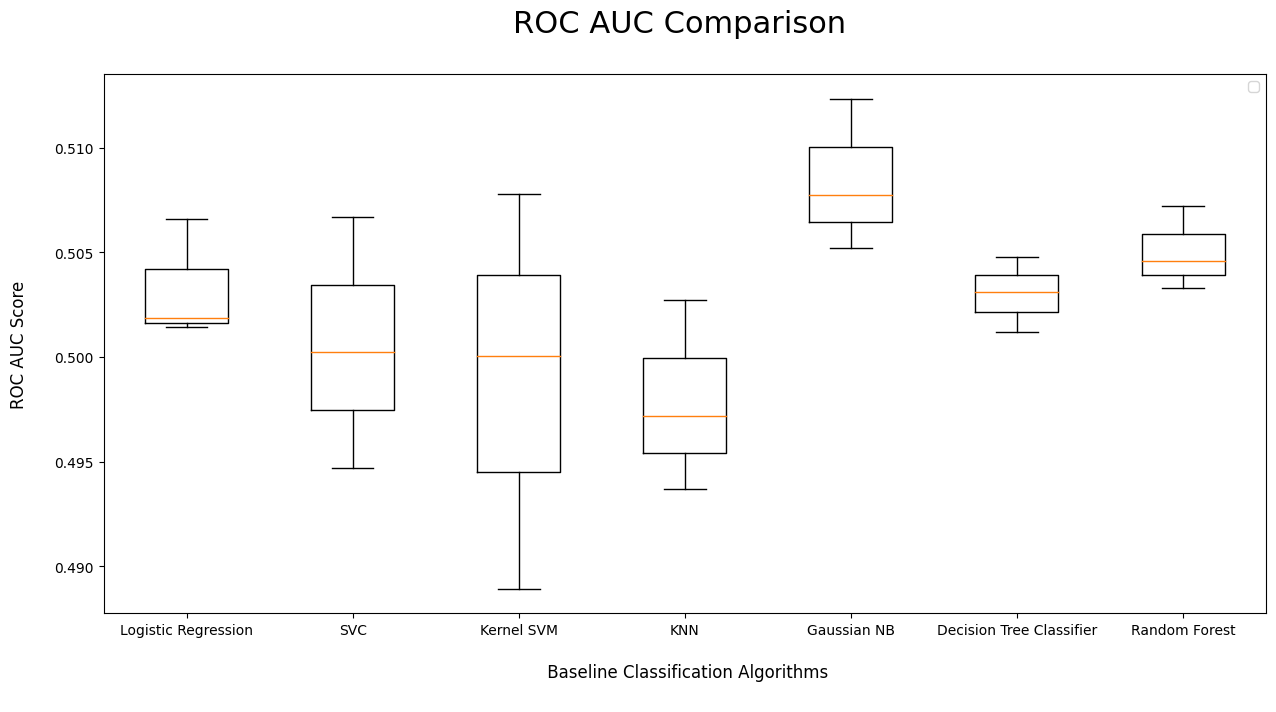

In [ ]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)

plt.ylabel('ROC AUC Score\n',
horizontalalignment="center",fontstyle = "normal",
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Baseline Classification Algorithms\n',
horizontalalignment="center",fontstyle = "normal",
fontsize = "large", fontfamily = "sans-serif")

plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22",
fontfamily = "sans-serif")

plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

# Get the right parameters for the baseline models

Identify the optimal number of K neighbors for KNN Model

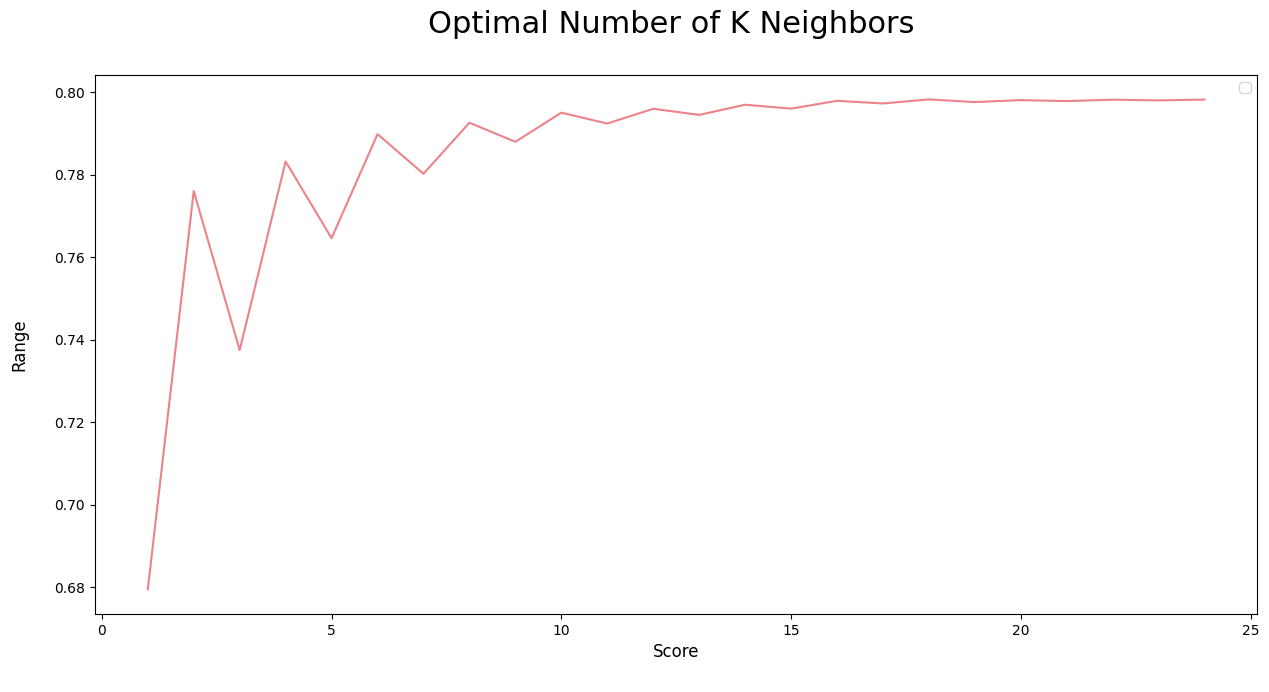

In [ ]:
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each)
    # set K neighbor as 3
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))

fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,25),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.title('Optimal Number of K Neighbors \n',
horizontalalignment="center", fontstyle = "normal",
fontsize = "22", fontfamily = "sans-serif")

plt.legend(loc='best', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

As we could see from the iterations above, the random forest model would attain the highest accuracy score when its n_estimators = 20.

Identify the optimal number of trees for Random Forest Model

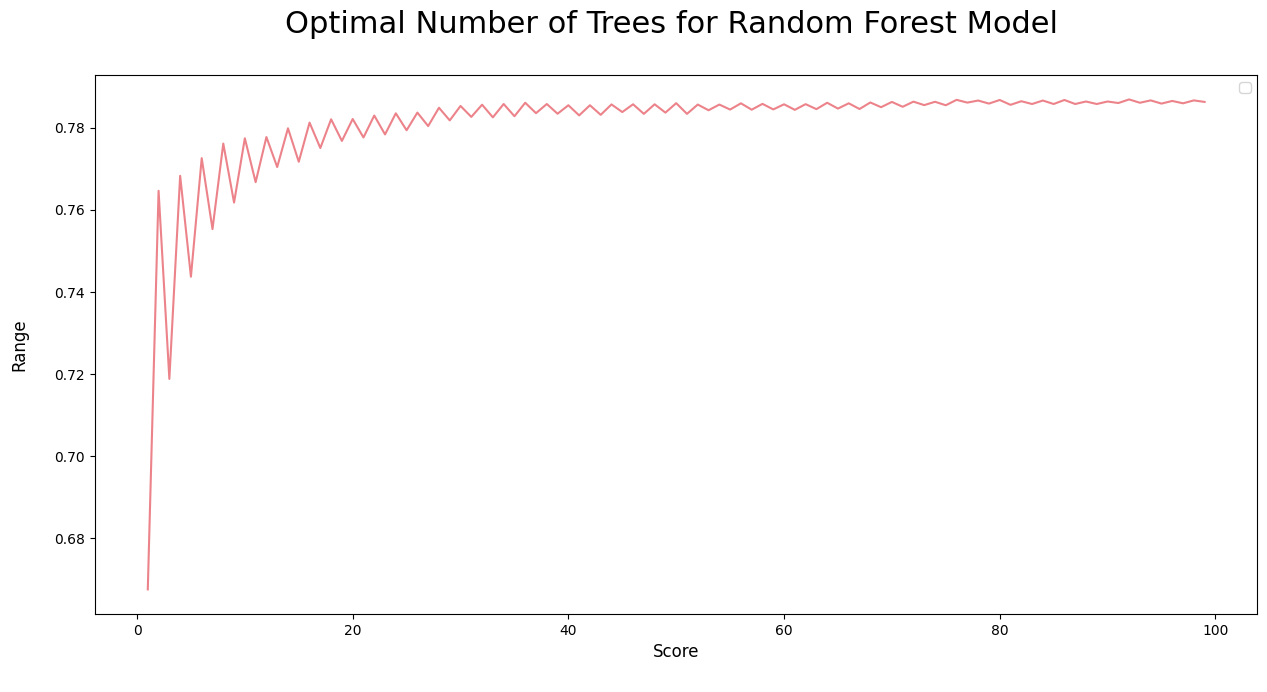

In [ ]:
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1)
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))

fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='best', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

# Compare Baseline Classification Algorithms (2nd Iteration)

Logistic Regression

In [ ]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision  Recall  F1 Score  F2 Score
0  Logistic Regression   0.80002        0.0     0.0       0.0       0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM

In [ ]:
# Fitting SVM (SVC class) to the Training set
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1, f2]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

          Model  Accuracy  Precision  Recall  F1 Score  F2 Score
0  SVM (Linear)   0.80002        0.0     0.0       0.0       0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K-Nearest Neighbors:

In [ ]:
# Fitting KNN to the Training set:
classifier = KNeighborsClassifier(
n_neighbors = 22,
metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred  = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['K-Nearest Neighbours', acc, prec, rec, f1, f2]],
                             columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

          Model  Accuracy  Precision  Recall  F1 Score  F2 Score
0  SVM (Linear)   0.80002        0.0     0.0       0.0       0.0


Kernel SVM:

In [ ]:
# Fitting Kernel SVM to the Training set:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Kernel SVM', acc, prec, rec, f1, f2]],
                             columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

          Model  Accuracy  Precision  Recall  F1 Score  F2 Score
0  SVM (Linear)   0.80002        0.0     0.0       0.0       0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Byes:

In [ ]:
# Fitting Naive Byes to the Training set:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Naive Byes', acc, prec, rec, f1, f2]],
                             columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

          Model  Accuracy  Precision  Recall  F1 Score  F2 Score
0  SVM (Linear)   0.80002        0.0     0.0       0.0       0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree

In [ ]:
# Fitting Decision Tree to the Training set:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1, f2]],
                             columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

          Model  Accuracy  Precision  Recall  F1 Score  F2 Score
0  SVM (Linear)   0.80002        0.0     0.0       0.0       0.0


Random Forest:

In [ ]:
# Fitting Random Forest to the Training set:
classifier = RandomForestClassifier(n_estimators = 72,
criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]],
                             columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

          Model  Accuracy  Precision  Recall  F1 Score  F2 Score
0  SVM (Linear)   0.80002        0.0     0.0       0.0       0.0


# Model Evaluation

Train & evaluate Chosen Model (Logistic Regression)

In [ ]:
classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(X_train, y_train)

# Predict the Test set results
y_pred = classifier.predict(X_test)

#Evaluate Model Results on Test Set:
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression',acc, prec, rec, f1, f2]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
print (results)

                 Model  Accuracy  Precision  Recall  F1 Score  F2 Score
0  Logistic Regression   0.80002        0.0     0.0       0.0       0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


k-Fold Cross-Validation

In [ ]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Logistic Regression Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Logistic Regression Classifier Accuracy: 0.80 (+/- 0.00)


Visualize results on a Confusion Matrix

Text(0.5, 23.52222222222222, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

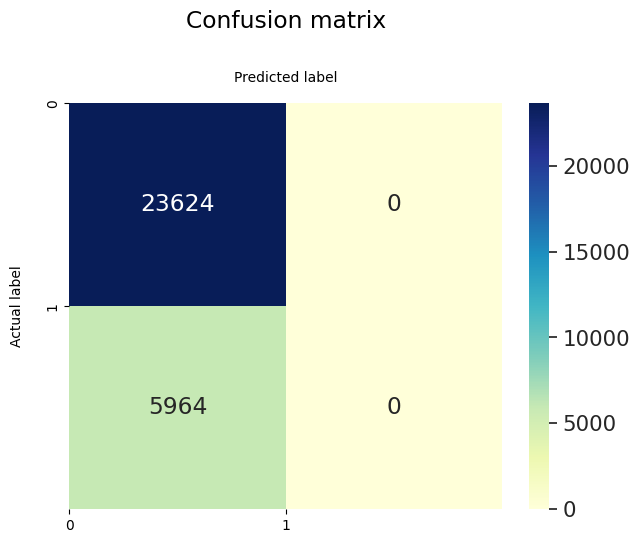

In [ ]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g', cmap="YlGnBu")
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

Predict Feature Importance

In [ ]:
# Analyzing Coefficients
feature_importances = pd.concat([
pd.DataFrame(dataset.drop(columns = 'customerID').
columns, columns = ["features"]),
pd.DataFrame(np.transpose(classifier.coef_),
columns = ["coef"])],axis = 1)
feature_importances.sort_values("coef", ascending = False)

,features,coef
0,Product Price,0.012440
4,Product Category_Books,0.007565
5,Product Category_Clothing,0.000972
9,Gender_Male,0.000653
2,Total Purchase Amount,0.000584
8,Gender_Female,-0.000653
6,Product Category_Electronics,-0.002683
7,Product Category_Home,-0.005842
1,Quantity,-0.005962
3,Age,-0.011315


# Model Improvement

Hyper parameter Tuning via Grid Search:



In [ ]:
# Round 1:
import time

# Define the classifier
classifier = LogisticRegression(random_state=0, solver='lbfgs')

# Select Regularization Method
penalty = ['l2']

# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# Combine Parameters
parameters = {'C': C, 'penalty': penalty, 'solver': solver}

lr_classifier = GridSearchCV(estimator=classifier,
                            param_grid=parameters,
                            scoring='balanced_accuracy',
                            cv=10,
                            n_jobs=-1)

t0 = time.time()
lr_classifier = lr_classifier.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_

print(lr_best_accuracy, lr_best_parameters)

Took 80.19 seconds
0.5 {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
# Round 2:
# Define the classifier
classifier = LogisticRegression(random_state=0, solver='lbfgs')

# Select Regularization Method
penalty = ['l2']

# Create regularization hyperparameter space
C = [0.1, 1, 10, 100]
solver = ['newton-cg', 'lbfgs', 'saga']

# Combine Parameters
parameters = {'C': C, 'penalty': penalty, 'solver': solver}

lr_classifier = GridSearchCV(estimator=classifier,
                            param_grid=parameters,
                            scoring='balanced_accuracy',
                            cv=10,
                            n_jobs=-1)

t0 = time.time()
lr_classifier = lr_classifier.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_

print("Best balanced accuracy:", lr_best_accuracy)
print("Best parameters:", lr_best_parameters)

Took 23.96 seconds
Best balanced accuracy: 0.5
Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


Final Hyperparameter tuning and selection:

In [ ]:
lr_classifier = LogisticRegression(random_state = 0, penalty = 'l2')
lr_classifier.fit(X_train, y_train)
# Predict the Test set results
y_pred = lr_classifier.predict(X_test)
#probability score
y_pred_probs = lr_classifier.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]

# Future Predictions

Compare predictions against the test set

[[23624     0]
 [ 5964     0]]
Test Data Accuracy: 0.7984


<Figure size 2800x2000 with 0 Axes>

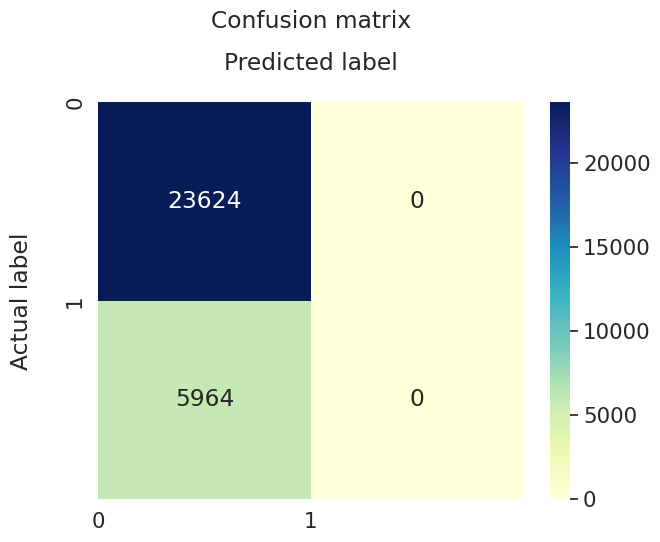

In [ ]:
#Revalidate final results with Confusion Matrix:
cm = confusion_matrix(y_test, y_pred)
print (cm)

#Confusion Matrix as a quick Crosstab:
pd.crosstab(y_test,pd.Series(y_pred),
rownames=['ACTUAL'],colnames=['PRED'])

#visualize Confusion Matrix:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g', cmap="YlGnBu")
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

Format Final Results

In [ ]:
final_results = pd.concat([test_identity, y_test], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results["propensity_to_churn(%)"] = y_pred_probs
final_results["propensity_to_churn(%)"] = final_results["propensity_to_churn(%)"]*100
final_results["propensity_to_churn(%)"]=final_results["propensity_to_churn(%)"].round(2)
final_results = final_results[['customerID', 'Churn', 'predictions', 'propensity_to_churn(%)']]
final_results ['Ranking'] = pd.qcut(final_results['propensity_to_churn(%)'].rank(method = 'first'),10,labels=range(10,0,-1))

# Save results to a new file
final_results.to_csv('final_results.csv', index=False)

# Model Deployment

Save the model

In [ ]:
filename = 'final_model.model'
i = [lr_classifier]
joblib.dump(i,filename)

['final_model.model']